In [1]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
import numpy as np
import os
import json

import imageio
import os

from PIL import Image, ImageDraw
import glob
import sys

sys.path.insert(1, os.path.join(sys.path[0], '../src/'))

from enr.misc.utils import open_runs
from enr.misc.viz import plot_run, make_gif

In [2]:
# from matplotlib import image as mpimg

# # load image
# path = '/project/gpuuva022/shared/equiv-neural-rendering/chairs/data_half/rot_dataset/train/000000.png'
# path = '/project/gpuuva022/shared/equiv-neural-rendering/chairs/data_half/rototrans_dataset/train/1a6f615e8b1b5ae4dbbc9440457e303e/00000.png'

# # load image
# img = mpimg.imread(path)
# img.shape

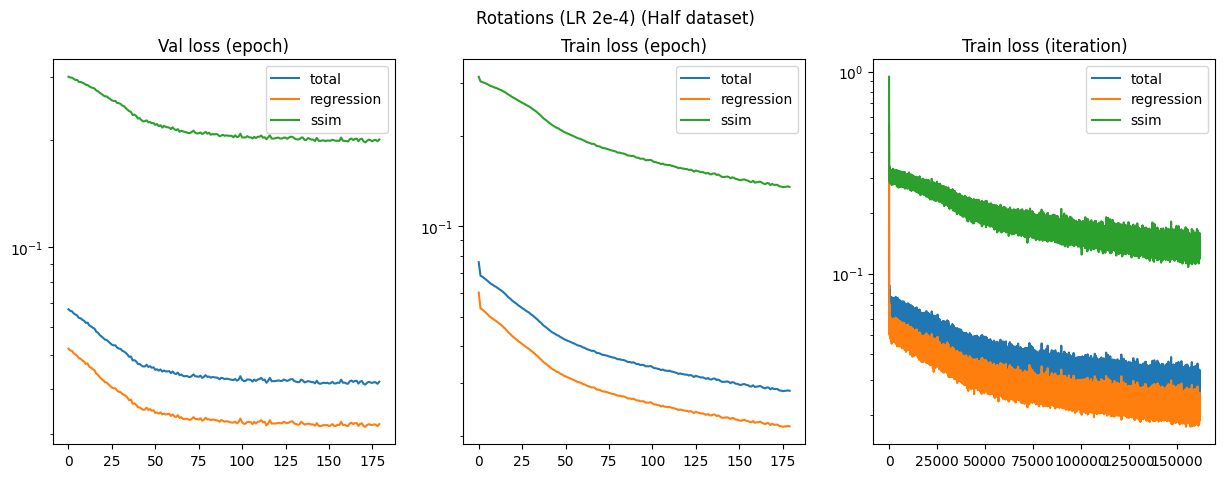

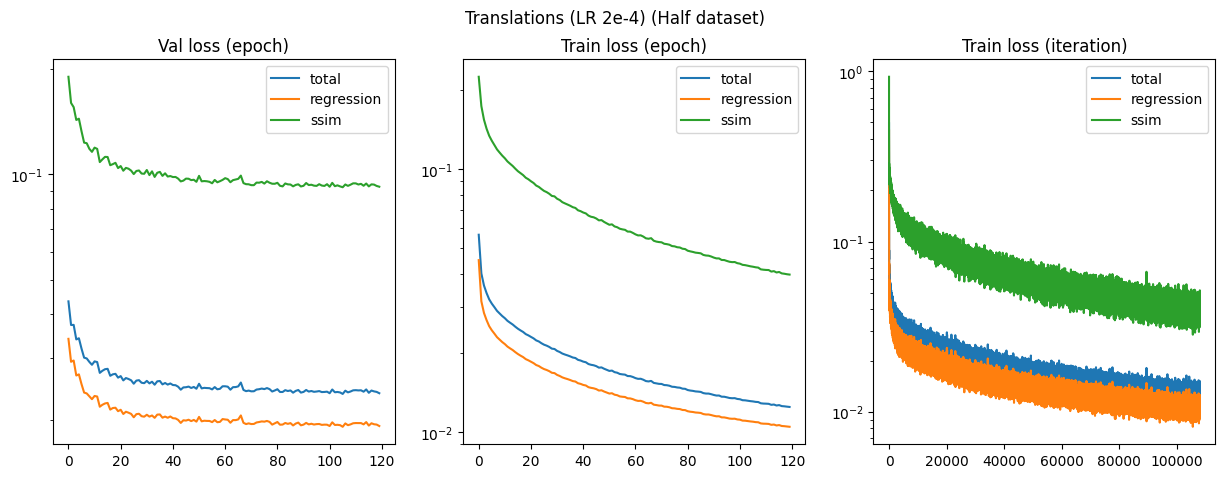

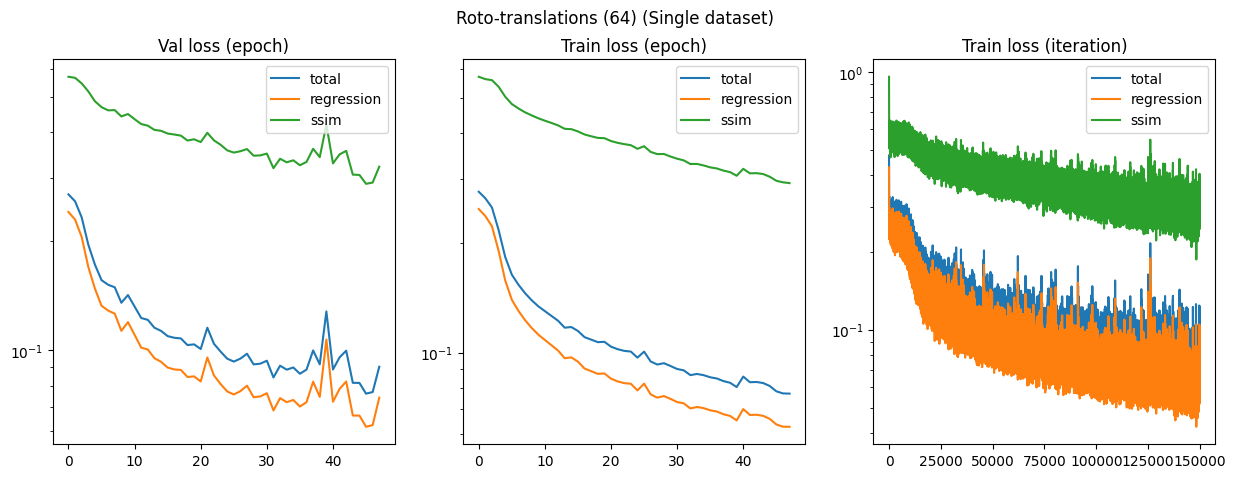

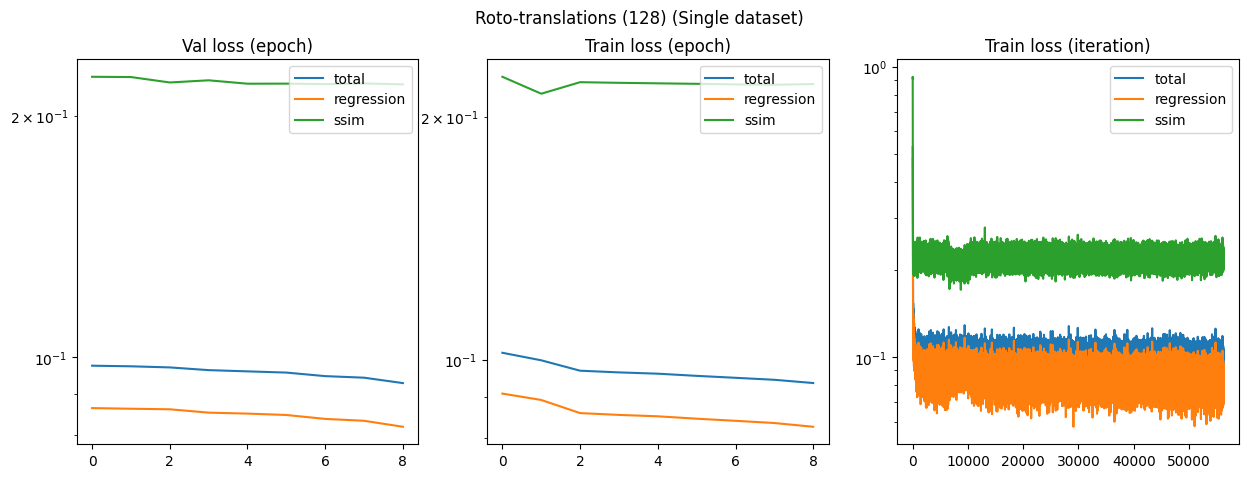

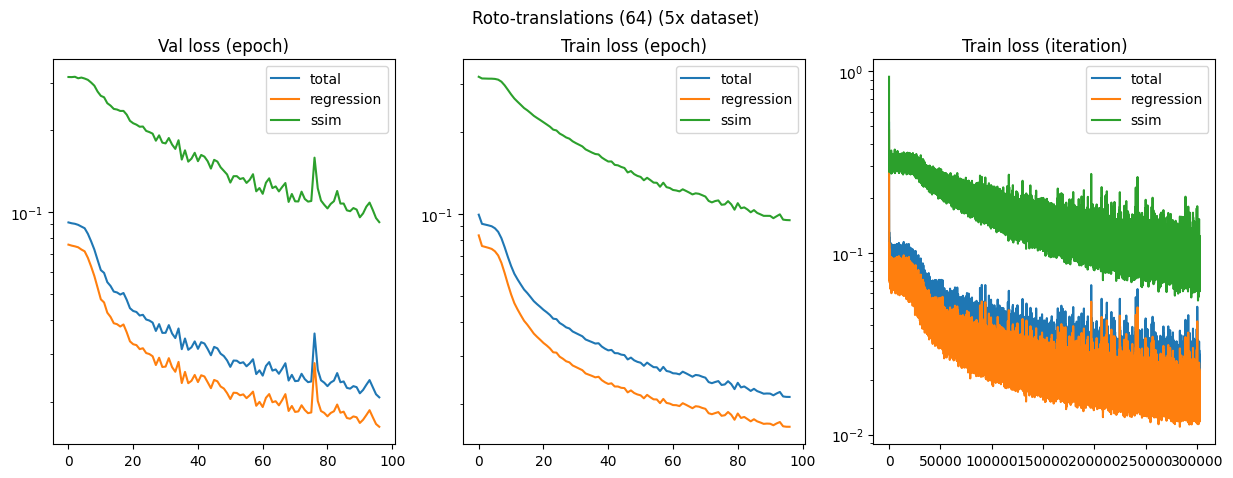

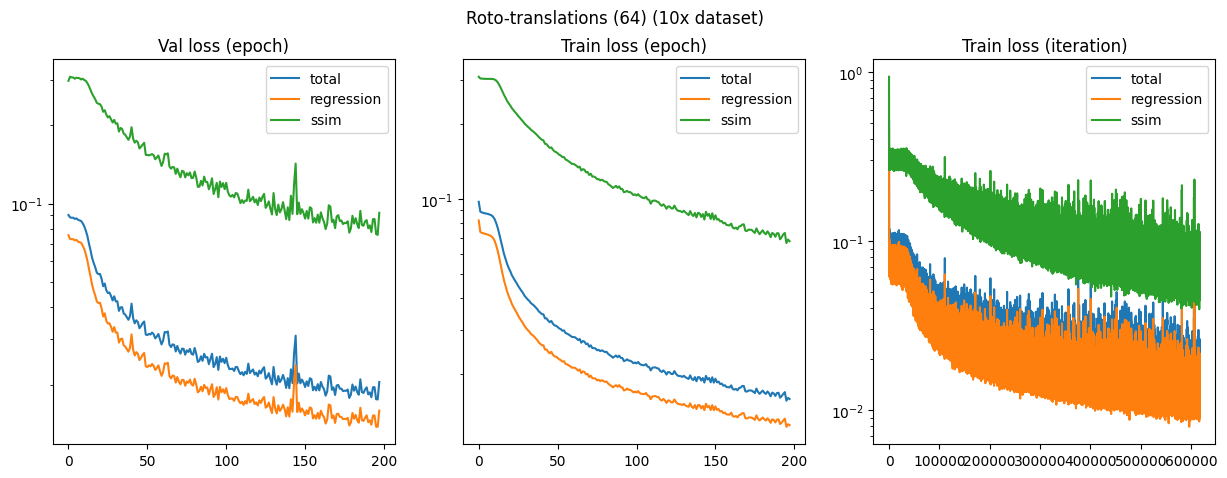

In [3]:
runs = open_runs({
    '2023-05-10_12-31_roto_lr2e-4' : {'desc' : 'Rotations (LR 2e-4) (Half dataset)'},
    '2023-05-14_16-54_trans_lr2e-4': {'desc' : 'Translations (LR 2e-4) (Half dataset)'},
    # '2023-05-17_18-25_rototrans_lr2e-4' : {'desc' : 'Roto-translations (LR 2e-4) (Half dataset)'},
    # '2023-05-18_14-23_rototrans_lr1e-7' : {'desc' : 'Roto-translations (LR 1e-7) (Tiny dataset)'},
    # '2023-05-18_13-34_rototrans_lr1e-6' : {'desc' : 'Roto-translations (LR 1e-6) (Tiny dataset)'},
    # '2023-05-18_13-38_rototrans_lr1e-5' : {'desc' : 'Roto-translations (LR 1e-5) (Tiny dataset)'},
    # '2023-05-18_13-38_rototrans_lr1e-4' : {'desc' : 'Roto-translations (LR 1e-4) (Tiny dataset)'},
    # '2023-05-18_19-35_rototrans_lr1e-7' : {'desc' : 'Roto-translations (LR 1e-7) (Half dataset)'},
    # '2023-05-18_15-24_rototrans_lr1e-6' : {'desc' : 'Roto-translations (LR 1e-6) (Half dataset)'},
    # '2023-05-18_15-24_rototrans_lr1e-5' : {'desc' : 'Roto-translations (LR 1e-5) (Half dataset)'},
    # '2023-05-18_19-35_rototrans_lr1e-4' : {'desc' : 'Roto-translations (LR 1e-4) (Half dataset)'},
    # '2023-05-19_11-00_roto_finetune_lr1e-5' : {'desc' : 'Roto-translations (LR 1e-5) (Full (?) dataset) (Finetune)'},
    # '60_rototrans_lr1e-5_continue' : {'desc' : 'Roto-translations (LR 1e-5) (Half dataset) (Continue)'},
    '2023-05-22_22-45_single_rototrans_lr2e-5_64' : {'desc' : 'Roto-translations (64) (Single dataset)'},
    '2023-05-22_22-46_single_rototrans_lr2e-5_128' : {'desc' : 'Roto-translations (128) (Single dataset)'},
    '2023-05-24_15-01_five_rototrans_lr2e-5_64' : {'desc' : 'Roto-translations (64) (5x dataset)'},
    '2023-05-25_14-41_data10_rototrans_lr2e-5_64' : {'desc' : 'Roto-translations (64) (10x dataset)'},
})

[plot_run(losses) for losses in runs.values()];
